<a href="https://colab.research.google.com/github/charleslien/blog/blob/main/notebooks/investment_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Investing and Stocks (for a Beginner)


The data are updated as of 2024 October 25. Run the Colab notebook (Runtime > Run All) for updated values.

In [ ]:
# @title Import Python Libraries
!pip install yfinance > /dev/null

import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# [Intro] Using Price of SPY at Close

For the rest of this article, I'm going to use SPY as the ETF of choice to represent the entire stock market. SPY is a very popular ETF tracking the top 500 companies, but the math is approximately equivalent for similar ETFs or index funds such as VOO, IVV, SWPPX, FXAIX, etc.

Assuming you aren't high-frequency trading, the prices in the middle of the day aren't very relevant. I'm going to use the daily price at "Close" (the last price this stock was traded at before the market closed) as an estimate of the daily value of SPY.

In [ ]:
# @title SPY Stock History
spy = yf.Ticker('SPY').history(period='max')
spy

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.626117,24.626117,24.503599,24.608614,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,24.626130,24.783653,24.626130,24.783653,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,24.766135,24.853648,24.713627,24.836145,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,24.871172,25.116208,24.853669,25.098705,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.186221,25.256232,24.906180,25.203724,531500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-10-21 00:00:00-04:00,583.849976,584.849976,580.599976,583.630005,36439000,0.0,0.0,0.0
2024-10-22 00:00:00-04:00,581.049988,584.500000,580.380005,583.320007,34183800,0.0,0.0,0.0
2024-10-23 00:00:00-04:00,581.260010,581.710022,574.419983,577.989990,49314600,0.0,0.0,0.0


# [Intro] Using Log


The price of the stock increasing by a certain *proportion* is what is important. If you spend \$100 buying a specific stock and it goes up 10%, you now have \$110 of that stock. It doesn't matter whether the stock price was originally \$2 and went up to \$2.20 or if it was originally \$100 and went up to \$110.

The stocks going up by a constant proportion have constant utility for our calculations, so it's more natural to look at the log of the stock price, which also goes up by a constant whenever the stock price increases by a given proportion.

Viewing the log-price as opposed to the price also makes the dips and market crashes clearer.

We know historically that there have been two large market crashes since the 1990s. One was the dot-com bubble burst in 2000-2002, and one was the housing bubble burst in 2008.

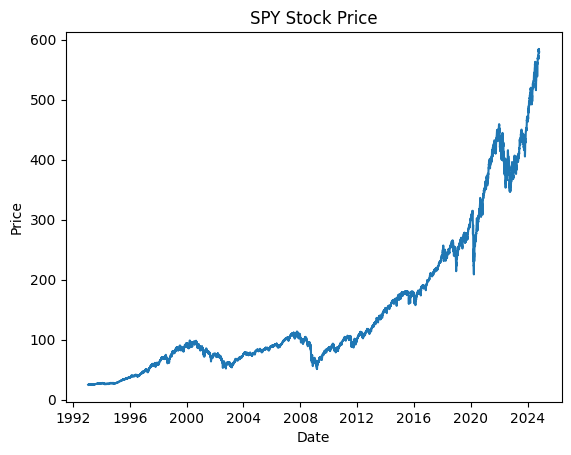

In [ ]:
# @title SPY Price Graph
plt.plot(spy['Close'])
plt.title('SPY Stock Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

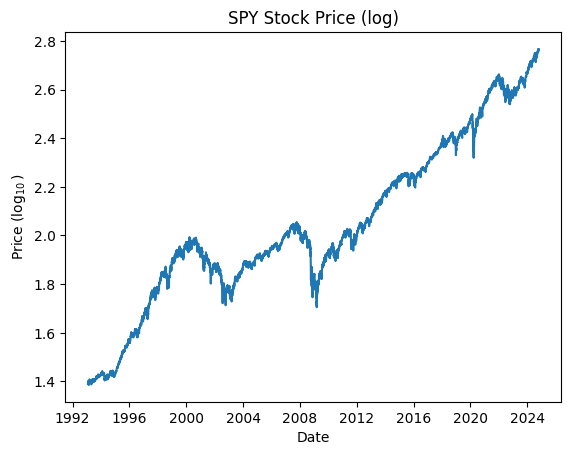

In [ ]:
# @title SPY Log-Price Graph
plt.plot(np.log10(spy['Close']))
plt.title('SPY Stock Price (log)')
plt.ylabel('Price ($\log_{10}$)')
plt.xlabel('Date')
plt.show()

If we look at the price graph (top), we can see the dips, but they look much smaller than the actual impact they had. The actual price only decreased by around \$50, which is easily made up within a few months in 2024. But what actually matters is the log-price. On the log-price graph (bottom), we see the two crashes are much more representative of the actual impact.

Since we are using log-price as our main metric instead of price, it's also worth noting that going forward, geometric means are more apt than arithmetic means.

# [Intro] Ignoring Taxes

Taxes are pretty complicated, and the exact numbers are also different for each individual (and even for the same individual for different years). To simplify the math, for the rest of this article, I'm going to assume the strategies apply to a retirement account such as a Roth IRA, where no taxes are paid.

## (Side Note: The Reality of Taxes)

The existence of taxes means "realizing" gains is detrimental, i.e., selling an asset. So buying and holding, in general, is a better strategy than "day trading," or constantly buying and selling (unless, of course, your "day trading" makes up more than enough to cover the loss of taxes).

Example: Assuming you pay 30% of gains in taxes and the stock market grows at a constant 10% each year, consider two scenarios:
- You buy \$100 worth of stock and hold it for 40 years:
  - 40 years later, you will have $100\cdot(1 + 0.10)^{40}\approx\$4526$ worth of stock.
  - If you sell at this point, you must pay taxes on the amount gained, which is approximately \\$4426.
  - You would be left with a total of $\$100+\$4426\cdot(1-0.30)\approx\$3198$.
- You buy \\$100 worth of stock, and every year (or at least once a year) for 40 years, sell it all and buy a different stock (that also grows at the same rate):
  - Each year, you must pay taxes on the 10% gained, meaning you only gain an effective $10\%\cdot(1-0.30)=7\%$.
  - After 40 years, you will have a total of $\$100\cdot(1+0.07)^{40}=\$1497$.

---


In this article, there are three investment types we will explore: high-yield savings accounts, 10-year treasuries, and stocks.

A high-yield savings account is just an account you can have with a bank. Any money you put into the bank will grow at (approximately) the risk-free interest rate. This interest is considered taxable income, meaning it is taxed depending on your income bracket at both the state and federal level.

10-year treasuries are special assets provided by the US government. You purchase them at a specific price, and obtain interest (usually) twice a year. You still need to pay taxes on these every year, but only federal taxes. No state taxes are required for treasuries.

Stocks have two taxable parts: capital gains and dividends.
- Whenever you sell the stock, assuming you are holding the stock for more than a year, you will be taxed a long-term capital gains tax depending on the amount earned. This tax only occurs *once*. And the tax percentage is lower than that of federal income tax. The exact amount depends on your income bracket.
- Dividends are small amounts of money periodically given by companies to all shareholders. Not all have stocks have dividends. Assuming you are holding the stock for sufficiently long (at least 60 days out of the 121-day period centered at the ex-dividend date), the dividends will be "qualified" and taxed at the same rate as long-term capital gains.

For SPY, the dividend amount (depends on the exact composition of SPY, but as of October 2024,) is around 1.2% per year, and the growth rate of SPY is close to 10%. So most of the net worth gained from SPY is not from dividends, which is good for tax purposes. Remember, dividends are taxed every year, and the growth is only taxed once ever.

So it really seems like the government *wants* you to buy stocks instead of holding money in a bank account. The tax rates are lower and in some sense subsidized. Which makes sense from the perspective of the government. They want money to be doing "work" in and stimulating the economy.

# [Intro] Emergency Fund


Sometimes, you don't have the option to hold the stock forever. If an emergency comes up and you don't have (non-invested) liquid assets, you will need to sell stock (and realize gains and be forced to pay taxes on those gains).

As we will see later, the strategies involving stocks have higher variance in the short term and lower variance in the long term. This is why it is recommended to buy stocks as a long-term strategy in your retirement account with money you won't expect to see until 40 or 50 years later, and also to have an emergency fund of liquid assets such as cash in a high-yield savings account.

I believe one recommendation is to have around 6 months of expenses in a savings account as an emergency fund, but it's up to you how much you want to put there. Personally, I have close to nothing in emergency savings, and I will just sell some stock if an emergency comes up.

# Risk-Free Interest Rate

One alternative to investing in the stock market, which is much more appealing for people unfamiliar with stocks, is savings accounts. The money you put in is guaranteed to make money (unless the bank holding your money goes out of business).

This means that, assuming you don't withdraw, the number of dollars in your bank account only goes up and never down. There is no risk. The interest rate you can get with no risk is also known as the risk-free interest rate. The approximation we will use for the rest of this article (and also used by economists) is the interest rate of 10-year US treasuries. As of October 2024, this rate is ~4%.

One thing we will see is that, in general, if you want higher yields, you will need to assume greater risk. But we will also see that the risk becomes lower "the longer you hold." This can also be thought of as "the longer you are away from selling," or "the longer you are away from retirement," or "the younger you are."

So as someone in their 20s or 30s, the best investment is the one with the highest average yield, nearly ignoring risk. As you get older, perhaps in your 50s or 60s, stocks may not be the best investment anymore.

Below is a graph showing the history of ^TNX, an index that tracks the interest rate of 10-year treasuries.

In [ ]:
# @title Interest Rate History
interest = yf.Ticker('^TNX').history(period='max')
interest

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02 00:00:00-06:00,4.060,4.060,4.060,4.060,0,0.0,0.0
1962-01-03 00:00:00-06:00,4.030,4.030,4.030,4.030,0,0.0,0.0
1962-01-04 00:00:00-06:00,3.990,3.990,3.990,3.990,0,0.0,0.0
1962-01-05 00:00:00-06:00,4.020,4.020,4.020,4.020,0,0.0,0.0
1962-01-08 00:00:00-06:00,4.030,4.030,4.030,4.030,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-21 00:00:00-05:00,4.138,4.186,4.124,4.182,0,0.0,0.0
2024-10-22 00:00:00-05:00,4.186,4.216,4.166,4.204,0,0.0,0.0
2024-10-23 00:00:00-05:00,4.236,4.258,4.220,4.242,0,0.0,0.0


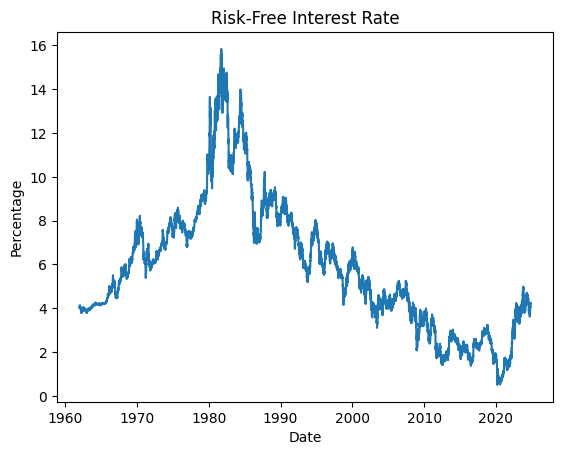

In [ ]:
# @title Interest Rate Graph
plt.plot(interest['Close'])
plt.title('Risk-Free Interest Rate')
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.show()

# [Efficient-Market Hypothesis](https://en.wikipedia.org/wiki/Efficient-market_hypothesis)


Consider the following thought experiment. Let's say it is common knowledge that tomorrow, the stock price of stock A (currently priced at \$100) will be up 5% to \$105. What would you do?

It seems like the most logical thing to do would be to buy as much of the stock as you can until it's "not worth it" anymore. What this means is that the stock price will go up to \$105 almost immediately (once this "common knowledge" is out), either by you buying or by someone else buying the stock.

The same occurs if it is common knowledge that stock A will be priced at \$95 tomorrow. People would simply trade at \$95 today instead.

This example shows the basis of the efficient-market hypothesis, which states that "asset prices reflect all available information," and that the market is "efficient." In other words, there is no "guaranteed" money to be made (past the risk-free interest rate).

In reality, this is not strictly true. Many companies are built on day trading and arbitrage and are able to make billions of dollars. However, those companies have access to very fast computers, and there are many companies competing with each other. If you join in, you will need to compete with these large companies as well. So on a human time scale of days (or even minutes), it is not unreasonable to assume the efficient-market hypothesis is true.

# Stock Prices are Memoryless

One common thought pattern is "a year ago, the price of X stock was P, so I'll just wait until it goes back down to P (or below) to buy," or perhaps differently worded, "the stock price right now is so high! I can't buy now! I have to wait until it goes back down..."

One corollary of the efficient-market hypothesis is that the current stock price is only based on the state of the world *now*. The fact that a stock price doubled in one day (or over 10 years) is not an indication that it will ever go back down to that price again. The stock price is only affected by the current world state, and past world states are irrelevant.

This means that once you condition on the current stock price, future stock prices are not a function of past stock prices. In other words, it is a "memoryless" system.

Another corollary is that you can't just "buy the dip" (i.e., buy when the market is low), mainly since it's impossible to know when the market will be low (or even whether the market is currently low). Let's consider a case where the stock price drops 10% within a few months. Does that mean this is "the dip?" Should we buy now? Should we wait for even longer? It could be the case that in a few months, the market recovers. But it could also be the case that in a few months, the market drops even more. And because of the efficient-market hypothesis, it's impossible to know which direction it will ultimately take until after it happens.

# Experiments

Let's run an experiment! This experiment may take multiple days, months, or even years, but it takes close to no effort.

Imagine you have recently come into some money—enough to buy one share of SPY. Search for "SPY stock" on the search engine of your choice, or look at the table in the [SPY section](#scrollTo=mpD3kXJcw5fU) of this notebook. As of October 2024, it's around $580.

Then, imagine buying SPY right now with the new money you have obtained (or with your existing money that may have been sitting around uninvested). Now wait for... however long you want! A few months? A year? 20 years? After we're done waiting, we can check the price again and see how much we would have made.

One assumption when we are running this experiment, of course, is that you don't have enough money to change the price by more than a negligible amount by buying. That the price of the market is independent of your personal actions in the market. That as far as the price of the stock is concerned, there is no difference between you hypothetically buying shares and actually buying shares. Given that around $30 billion of SPY is traded per day (as of October 2024), this assumption seems fair (given that you are reading this article and therefore probably don't have billions of uninvested dollars sitting around).

A few years is a long time to wait, and I assume you want the results now (as do I). And due to the "common knowledge" that stocks are a good investment, it should be higher in the future, right? Well, nobody can guarantee the stock will go up within any given period of time (due to the efficient-market hypothesis). But we can run a thought experiment to tell us what we can expect the distribution to look like.

Instead of running this experiment starting now, imagine someone from the past started running this experiment. And they waited some number of trading days to see the results of their experiment. If we assume this person was equally distributed among all possible past dates, we can see the results now!

Note that the following results are comparing buying stock to holding cash, which is probably not the best alternative. Putting cash in a high-yield savings account is a much better option than holding cash. We will see the results of comparing stock vs. a risk-free asset in the [Alternative Strategy: Hold Risk-Free section](#scrollTo=Mvjd4DKG3RZN).

Let's take a look!

In [ ]:
# @title Define Function
def printable_delta(o):
  p = str(o)
  if p.startswith('-'):
    return p
  return '+' + p

def historical_stats_after_waiting(*, days, period, print_data=True, inverse=False):
  prices = np.log10(np.array(spy['Close']))
  log_diffs = prices[days:] - prices[:-days]
  if inverse:
    log_diffs = -log_diffs
  log_diffs.sort()
  n = len(log_diffs)
  percentiles = [5, 15, 50, 85, 95]
  indices = (n * np.array(percentiles) / 100.).astype(int)

  plt.hist(log_diffs, bins=100)
  plt.axvline(x=0, color='r')
  plt.title(f'Log-Price Difference After {period}')
  plt.ylabel('Frequency')
  plt.xlabel('Log-Price Difference')
  plt.show()

  if not print_data:
    return
  m = np.mean(log_diffs)
  s = np.std(log_diffs)
  print(f'Average log-price change: {printable_delta(np.round(m, 5))}')
  print(f'Standard deviation of log-price change: {np.round(s, 5)}')
  print()
  print(f'Geometric mean of price change: {printable_delta(np.round((np.power(10, np.mean(log_diffs)) - 1) * 100, 2))}%')
  print()
  print(f'Price change percentiles {tuple(percentiles)}:')
  print(f'({", ".join(printable_delta(x) for x in np.round((np.power(10, log_diffs[indices]) - 1) * 100, 3))})%')
  print()
  print(f'Worst case: {printable_delta(np.round((np.power(10, min(log_diffs)) - 1) * 100, 2))}%')
  print(f'Best case: {printable_delta(np.round((np.power(10, max(log_diffs)) - 1) * 100, 2))}%')
  print()
  print(f'Chance of "regret" (i.e. that price is higher today than {period} in the future): {np.round(np.sum(log_diffs < 0) / len(log_diffs) * 100, 1)}%')

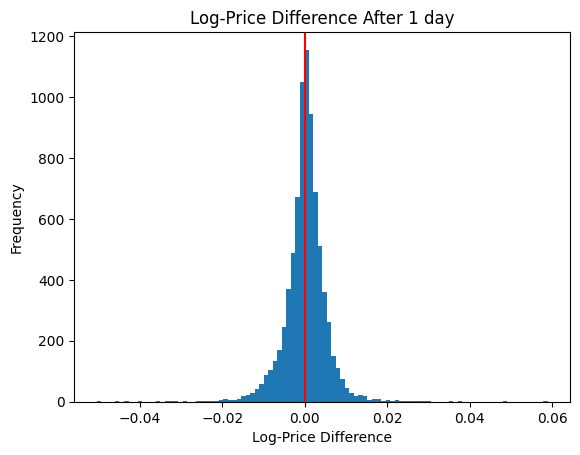

Average log-price change: +0.00017
Standard deviation of log-price change: 0.0051

Geometric mean of price change: +0.04%

Price change percentiles (5, 15, 50, 85, 95):
(-1.811, -0.859, +0.068, +0.955, +1.705)%

Worst case: -10.94%
Best case: +14.52%

Chance of "regret" (i.e. that price is higher today than 1 day in the future): 45.3%


In [ ]:
# @title 1 Day
historical_stats_after_waiting(days=1, period='1 day')

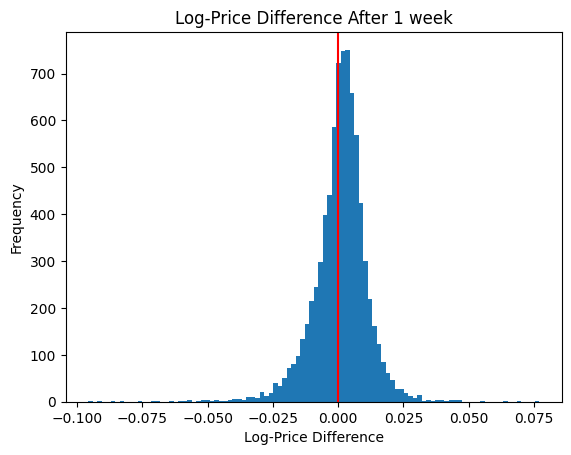

Average log-price change: +0.00086
Standard deviation of log-price change: 0.01045

Geometric mean of price change: +0.2%

Price change percentiles (5, 15, 50, 85, 95):
(-3.692, -1.825, +0.372, +2.16, +3.648)%

Worst case: -19.79%
Best case: +19.4%

Chance of "regret" (i.e. that price is higher today than 1 week in the future): 41.0%


In [ ]:
# @title 1 Week
historical_stats_after_waiting(days=5, period='1 week')

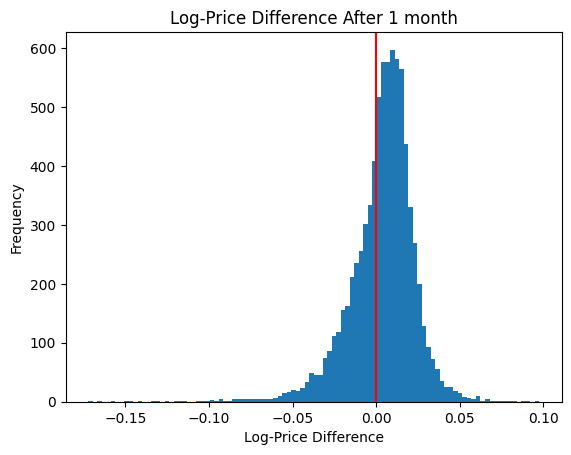

Average log-price change: +0.0036
Standard deviation of log-price change: 0.02015

Geometric mean of price change: +0.83%

Price change percentiles (5, 15, 50, 85, 95):
(-6.686, -3.193, +1.441, +4.751, +7.095)%

Worst case: -32.75%
Best case: +25.19%

Chance of "regret" (i.e. that price is higher today than 1 month in the future): 34.4%


In [ ]:
# @title 1 Month
historical_stats_after_waiting(days=21, period='1 month')

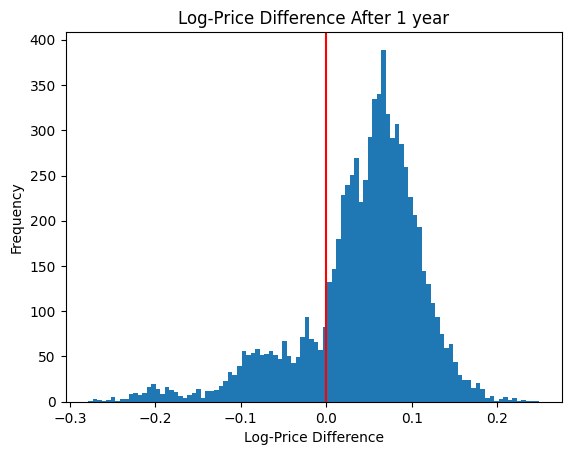

Average log-price change: +0.04222
Standard deviation of log-price change: 0.07206

Geometric mean of price change: +10.21%

Price change percentiles (5, 15, 50, 85, 95):
(-20.324, -5.408, +13.887, +27.15, +36.083)%

Worst case: -47.35%
Best case: +77.5%

Chance of "regret" (i.e. that price is higher today than 1 year in the future): 19.3%


In [ ]:
# @title 1 Year
historical_stats_after_waiting(days=252, period='1 year')

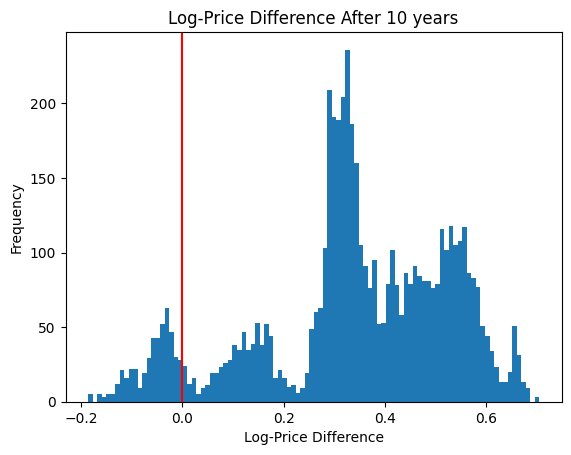

Average log-price change: +0.34318
Standard deviation of log-price change: 0.187

Geometric mean of price change: +120.38%

Price change percentiles (5, 15, 50, 85, 95):
(-8.962, +35.737, +121.024, +247.623, +292.452)%

Worst case: -34.85%
Best case: +406.6%

Chance of "regret" (i.e. that price is higher today than 10 years in the future): 8.7%


In [ ]:
# @title 10 Years
historical_stats_after_waiting(days=2520, period='10 years')

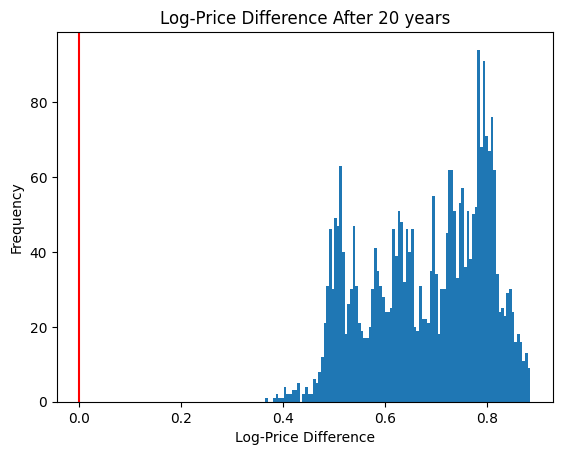

Average log-price change: +0.68276
Standard deviation of log-price change: 0.11543

Geometric mean of price change: +381.68%

Price change percentiles (5, 15, 50, 85, 95):
(+210.973, +240.514, +403.59, +537.957, +594.458)%

Worst case: +131.57%
Best case: +667.69%

Chance of "regret" (i.e. that price is higher today than 20 years in the future): 0.0%


In [ ]:
# @title 20 Years
historical_stats_after_waiting(days=5040, period='20 years')

# Standard Deviation Trends Sublinearly with Time

In the results of the experiment for waiting a single day, the mean log-price increase is $1.7\cdot10^{-4}$, and the standard deviation is $5.1\cdot10^{-3}$, which is around 30 times the mean.

According to the efficient-market hypothesis, we expect each day's stock price change to be independent of the previous prices.

If we were to view the results after two days of waiting, we would expect the mean to approximately double, because of [linearity of expectation](https://en.wikipedia.org/wiki/Expected_value#Properties). Since the two days are (in theory) independent random variables, we would expect the variance to be [doubled](https://en.wikipedia.org/wiki/Variance#Linear_combinations) as well. However, since standard deviation is equal to the square root of the variance, the standard deviation only increases by a factor of $\sqrt{2}$, which is significantly less than 2.

In general, after waiting $n$ intervals, we would expect the mean to increase by a factor of $n$ and the standard deviation to increase by a factor of $\sqrt{n}$ from those of waiting a single interval.

If this is the case, i.e. that standard deviation increases proportionally less than the mean does over time, then the implication is that if we buy stock and wait a long enough period, the probability of losing money decreases to 0.

After waiting $30^2$ days, or around 3 and a half years, the standard deviation and the mean will be approximately equal, and the probability of losing money will only be around 15%.

After waiting $(2*30)^2$ days, or around 14 years, the mean will be approximately equal to two standard deviations, and the probability of losing money will only be around 2.5%.

Now, this is all assuming that our theory of both mean and variance increasing linearly with time is true. Now, let's look at the actual data.

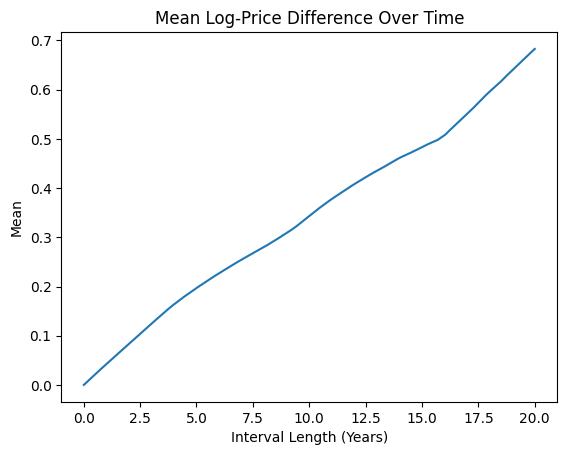

In [ ]:
# @title Mean of Log-Price Over Time
prices = np.log10(np.array(spy['Close']))
days = np.array(range(1, 5041))
years = days / 252
means = []
vars = []
for n in days:
  log_diffs = prices[n:] - prices[:-n]
  means.append(np.mean(log_diffs))
  vars.append(np.std(log_diffs) ** 2)
plt.plot(years, means)
plt.title('Mean Log-Price Difference Over Time')
plt.ylabel('Mean')
plt.xlabel('Interval Length (Years)')
plt.show()

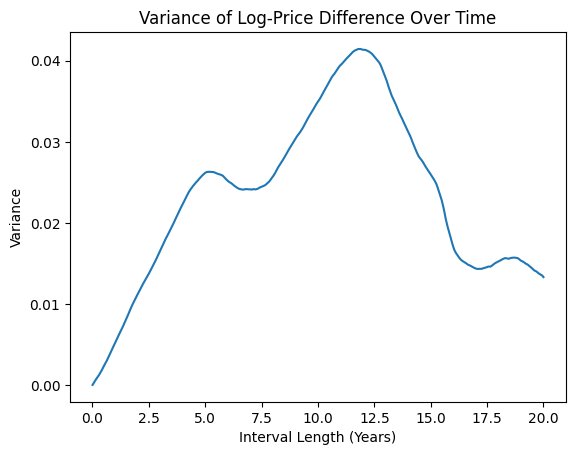

In [ ]:
# @title Variance of Log-Price Over Time
plt.plot(years, vars)
plt.title('Variance of Log-Price Difference Over Time')
plt.ylabel('Variance')
plt.xlabel('Interval Length (Years)')
plt.show()

In the graphs above, we conduct the same experiment as before for every single interval length from 1 day to 5040 days (or 20 years). The full distributions of the difference in log-price are calculated, and the means (first graph) and variances (second graph) of these distributions are shown.

It seems that the mean does indeed follow this trend of increasing linearly. However, the variance does not increase linearly. It appears to start off with a linear trend, but as we wait longer, it actually decreases!

There are a few potential explanations for this.

One explanation may be that we simply don't have enough data for "waiting 20 years," since SPY has only existed for around 30 years as of the writing of this article. Thus, the data are heteroskedastic (i.e., less accurate as the length of the interval increases).

Another explanation is that as the idea of "just invest in stocks" has become common knowledge, the growth of stocks has become more consistent. The longer the interval, the more percentage of the distribution reflects recent history after this knowledge has been spread.

Yet another explanation is that crashes cause the variance of the distribution to increase wildly. Within the lifetime of SPY, there have only been two (...and they occurred within 10 years of each other). Every possible 20-year period in history contains at least one crash, and most of them contain two. Whereas 10-year periods could contain zero, one, or two crashes. And other than the two crashes, the market grows at a pretty consistent low-variance rate.

# Alternative Strategy: Hold Risk-Free

The conclusion of our experiments is that holding cash is not a reasonable long-term alternative to holding stock. However, in the [Risk-Free Interest Rate section](#scrollTo=3Qh17cyzufT4), I mentioned that there is a consistent way to earn interest with "no risk" (in quotes because of points I will bring up later in [A New Perspective](#scrollTo=rhgAuWod48rG)).

As I mentioned before, I will use 10-year US treasury rates (specifically, ^TNX) as a proxy for the risk-free interest rate. It is worth noting that if you were to actually buy 10-year treasuries, you would not be able to cash them out before the 10-year period is up. You can sell them to other people, but the price would depend on what the market believes the future interest rate will be. This will have higher variance, and you could end up losing money, which defeats the purpose of holding treasuries in the first place (risk-free money, right?).

Therefore, this "asset" that always grows at the same rate as the risk-free interest rate is purely hypothetical and doesn't really exist (although I'm sure there may be some ETFs using options that could emulate it).

In [ ]:
# @title Download Data
vals = yf.Tickers(['^TNX', 'SPY']).history(period='max')['Close']
vals = vals.dropna()

[*********************100%***********************]  2 of 2 completed


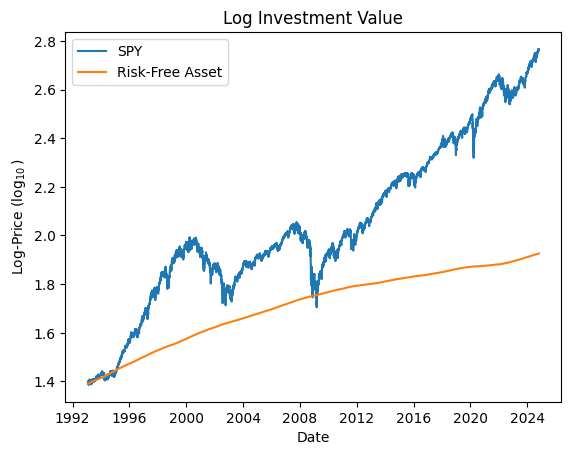

In [ ]:
# @title SPY vs Risk-Free Asset Graph
spy_a = np.log10(vals['SPY'])
interest_a = np.array(vals['^TNX'])
interest_a = np.log10(1 + interest_a / 100 / 252)
interest_a = np.cumsum(interest_a)
plt.plot(spy_a)
plt.plot(vals.index, interest_a + next(iter(spy_a)))
plt.title('Log Investment Value')
plt.ylabel('Log-Price ($\log_{10}$)')
plt.xlabel('Date')
plt.legend(['SPY', 'Risk-Free Asset'])
plt.show()

The graph above shows the price of SPY as well as the value of a risk-free asset. However, since these are logscale graphs, each trend line could be shifted up or down by any amount and still convey the same information. In this specific graph, I chose to standardize the prices of the two assets at the date of inception of SPY.

It seems that specifically during market crashes, the risk-free asset performs better than stocks. However, throughout all of history, including crashes, the average growth of SPY is still greater than the growth rate of risk-free interest.

Now, let's run the same [experiment](#scrollTo=EspYNk-TvpCw) while considering the alternative of investing the money in some asset that grows with the risk-free interest rate instead of holding cash.

In [ ]:
# @title Define Function
def historical_stats_compared_to_risk_free(*, days, period, inverse=False):
  prices = np.array(spy_a) - interest_a
  log_diffs = prices[days:] - prices[:-days]
  if inverse:
    log_diffs = -log_diffs
  log_diffs.sort()
  n = len(log_diffs)
  percentiles = [5, 15, 50, 85, 95]
  indices = (n * np.array(percentiles) / 100.).astype(int)

  plt.hist(log_diffs, bins=100)
  plt.axvline(x=0, color='r')
  plt.title(f'Log-Price Difference After {period} Between SPY and Risk-Free Asset')
  plt.ylabel('Frequency')
  plt.xlabel('Log-Price Difference')
  plt.show()

  m = np.mean(log_diffs)
  s = np.std(log_diffs)
  print(f'Average log-price difference: {printable_delta(np.round(m, 5))}')
  print(f'Standard deviation of log-price difference: {np.round(s, 5)}')
  print()
  print(f'Geometric mean of price difference: {printable_delta(np.round((np.power(10, np.mean(log_diffs)) - 1) * 100, 2))}%')
  print()
  print(f'Price difference percentiles {tuple(percentiles)}:')
  print(f'({", ".join(printable_delta(x) for x in np.round((np.power(10, log_diffs[indices]) - 1) * 100, 3))})%')
  print()
  print(f'Worst case: {printable_delta(np.round((np.power(10, min(log_diffs)) - 1) * 100, 2))}%')
  print(f'Best case: {printable_delta(np.round((np.power(10, max(log_diffs)) - 1) * 100, 2))}%')
  print()
  print(f'Chance of "regret" (i.e. that price is higher today than the risk-free asset {period} in the future): {np.round(np.sum(log_diffs < 0) / len(log_diffs) * 100, 1)}%')

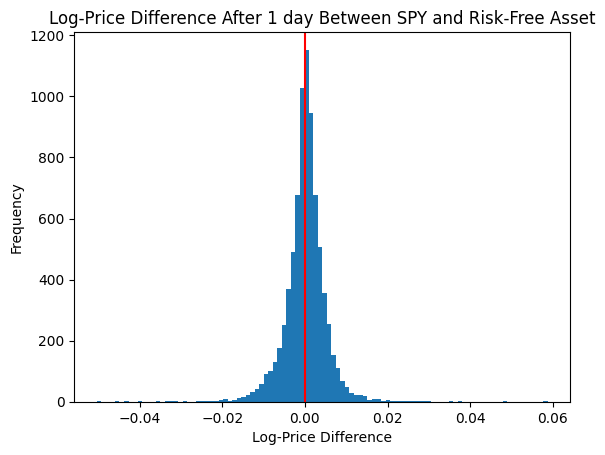

Average log-price difference: +0.0001
Standard deviation of log-price difference: 0.00511

Geometric mean of price difference: +0.02%

Price difference percentiles (5, 15, 50, 85, 95):
(-1.832, -0.878, +0.053, +0.94, +1.696)%

Worst case: -10.94%
Best case: +14.5%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 1 day in the future): 46.5%


In [ ]:
# @title 1 Day
historical_stats_compared_to_risk_free(days=1, period='1 day')

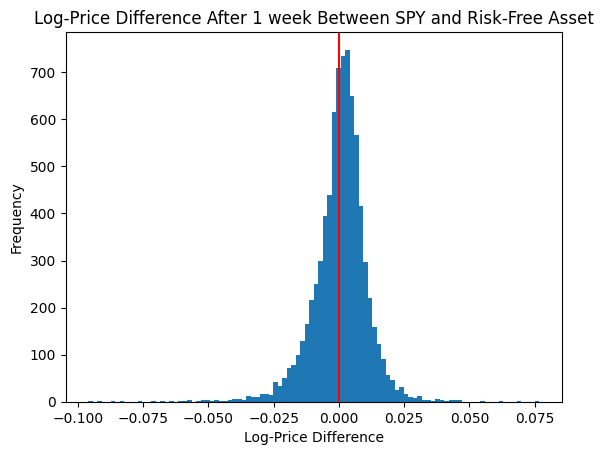

Average log-price difference: +0.00052
Standard deviation of log-price difference: 0.01046

Geometric mean of price difference: +0.12%

Price difference percentiles (5, 15, 50, 85, 95):
(-3.777, -1.913, +0.293, +2.088, +3.579)%

Worst case: -19.85%
Best case: +19.33%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 1 week in the future): 43.0%


In [ ]:
# @title 1 Week
historical_stats_compared_to_risk_free(days=5, period='1 week')

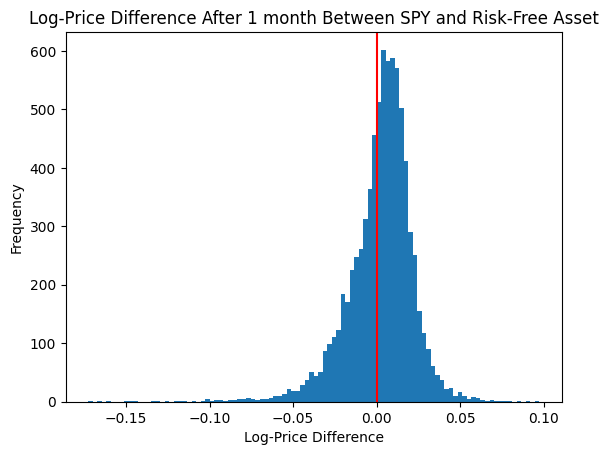

Average log-price difference: +0.0022
Standard deviation of log-price difference: 0.0202

Geometric mean of price difference: +0.51%

Price difference percentiles (5, 15, 50, 85, 95):
(-7.024, -3.523, +1.127, +4.417, +6.833)%

Worst case: -32.81%
Best case: +25.11%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 1 month in the future): 37.6%


In [ ]:
# @title 1 Month
historical_stats_compared_to_risk_free(days=21, period='1 month')

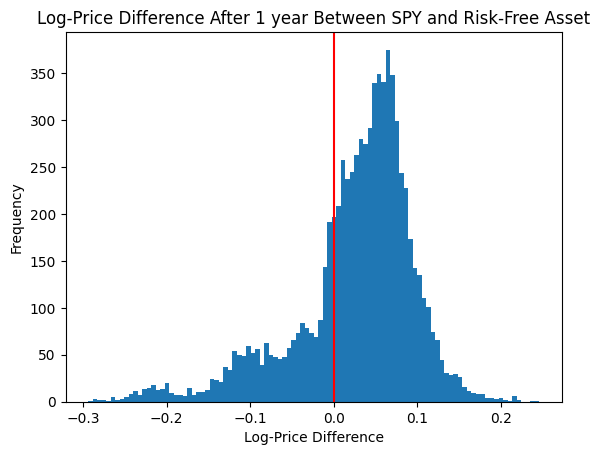

Average log-price difference: +0.02558
Standard deviation of log-price difference: 0.0726

Geometric mean of price difference: +6.07%

Price difference percentiles (5, 15, 50, 85, 95):
(-23.938, -9.028, +9.786, +21.94, +30.566)%

Worst case: -49.15%
Best case: +76.0%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 1 year in the future): 25.8%


In [ ]:
# @title 1 Year
historical_stats_compared_to_risk_free(days=252, period='1 year')

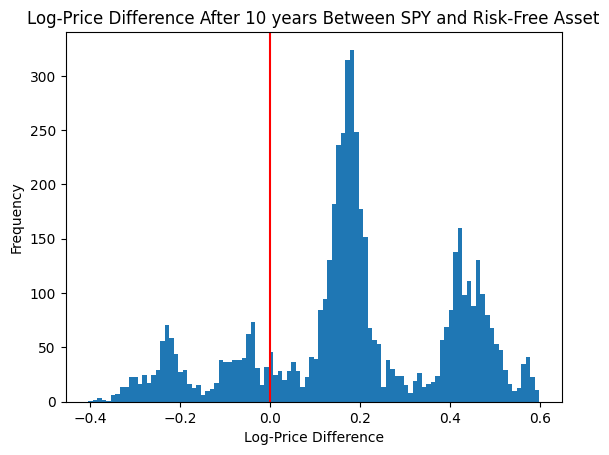

Average log-price difference: +0.18639
Standard deviation of log-price difference: 0.21666

Geometric mean of price difference: +53.6%

Price difference percentiles (5, 15, 50, 85, 95):
(-41.351, -11.182, +51.216, +175.957, +215.13)%

Worst case: -60.52%
Best case: +295.95%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 10 years in the future): 19.1%


In [ ]:
# @title 10 Years
historical_stats_compared_to_risk_free(days=2520, period='10 years')

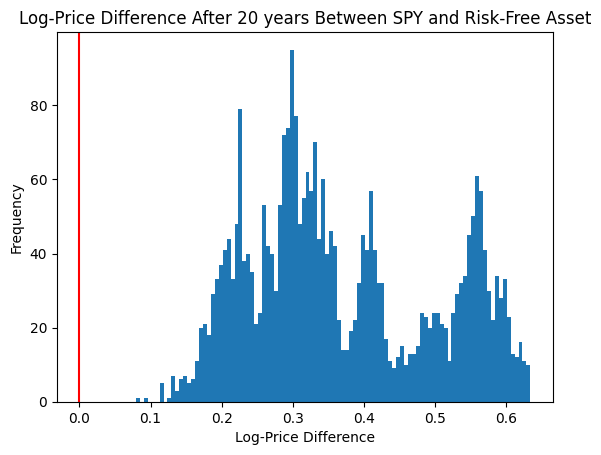

Average log-price difference: +0.37011
Standard deviation of log-price difference: 0.13017

Geometric mean of price difference: +134.48%

Price difference percentiles (5, 15, 50, 85, 95):
(+55.288, +69.004, +117.487, +255.793, +288.878)%

Worst case: +20.08%
Best case: +330.72%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 20 years in the future): 0.0%


In [ ]:
# @title 20 Years
historical_stats_compared_to_risk_free(days=5040, period='20 years')

As we can see, the differences are not quite as drastic as when we compared against holding cash. But stocks still beat out the risk-free asset slowly and methodically. In fact, there is no 20-year period in history in which investing in stocks has yielded a lower return than investing in a risk-free asset.

# A Hypothetical Stock

Imagine a very simplified version of a stock. Let's call it the "N" or "Nothing" stock. Every day, stock N follows the same pattern: it starts the day priced at $x$. At the end of the day, it has a 50% chance of being priced at $\frac{1}{2}x$ and a 50% chance of being priced at $\frac{3}{2}x$. How much of stock N should you buy?

The classic advice is to "increase your expected value of money," but in this case, the expected value of buying stock N is 0 ($\frac{1}{2}$ chance of $+\frac{1}{2}x$, $\frac{1}{2}$ chance of $-\frac{1}{2}x$). And in such cases, the classic advice is to lower variance.

...But why? How much variance is too much? Surely, the metric isn't lexicographic (i.e., always maximize expected value, then only consider variance if there's a tie between two options with the same expected value)? If there was a similar stock with an expected value of $+10^{-100}$ but a standard deviation of $10^{100}$, would we do that? That seems ridiculous!

And SPY seems too high variance in that case, right? For the distribution of change in price of any given day, the standard deviation is 30 times the mean!

---

Let's consider a slightly different stock, called "TON" or "Triple Or Nothing." This stock only exists for one day and either increases to $3x$ or decreases to $0$. Now, the expected value is positive (more specifically, $+\frac{1}{2}x$).

Imagine we have access to 10 instances of stock TON in 10 consecutive days. How much would you (or should you) buy each day? If we are trying to maximize the expected value of our net worth, we would simply spend all of our money every day.

If we start with $X$ total net worth, each day, the EV of our net worth would increase by 1.5 times. So at the end, the EV of our net worth would be $X\cdot(1.5)^{10}\approx58X$. That's pretty good!

But expected value only shows one dimension of the final result. What would be the full probability distribution of our net worth?

Well, if *any* of the TON stocks crash, our net worth for the rest of the iterations is 0. So we would end up with a $(\frac{1}{2})^{10}$, or $\sim 0.1\%$ chance of getting lucky and having a total of $3^{10}X\approx 59,000X$. And the rest of the $\sim 99.9\%$ of the time, we would have 0. Although this does maximize the expected value of our net worth, that's probably not the outcome we want. (And also, instead of 10 times, we can also consider this with 20 or 30 or 1000 iterations, and the result would be even worse.)

---

Our utility (in the economics sense) as a function of money is not simply a linear function of the money we have. If your net worth is \\$1,000, and you gain \\$10,000, you would be elated! But if your net worth is \\$1 billion and you gain \\$10,000, you would probably be only slightly satisfied (or perhaps not even satisfied at all). There are diminishing returns.

The utility for each individual as a function of their net worth is different, but one function that is a relatively reasonable proxy for anybody is **log of net worth**. If we assume log-net worth to be representative of utility, one corollary is: no matter how rich you are, you are always approximately equally happy to double your net worth. That seems like a (at least not un)reasonable measure of utility.

---

So now let's revisit the question. If you got access to 10 instances of the TON stock 10 times, how much should you buy of each? Well, the answer is to simply do whatever maximizes the expected value of your utility. After a single round:
- Your net worth is $X$, and you buy $b$.
- Your utility would have a $\frac{1}{2}$ chance of being $\log(X+2b)$ and a $\frac{1}{2}$ chance of being $\log(X-b)$.
- So the expected value of your utility is $\frac{1}{2}(\log(X+2b) + \log(X-b))=\frac{1}{2}\log(-2b^2+Xb-X^2)$.
- We are trying to choose $b$ to maximize this quantity, where $X$ is a constant. The value of $b$ that maximizes this quantity is $b=\frac{1}{4}X$.

So to maximize the expected value of our utility, we should TON with a quarter of our net worth every day.

Again, we can (and should) ask, "What would be the full probability distribution of our net worth?"

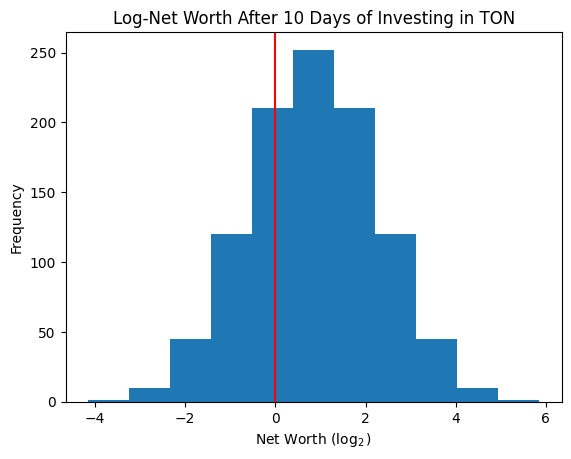

Average log base 2 net worth increase: 0.85
Arithmetic mean of net worth: 3.247*X
Geometric mean of net worth: 1.802*X
Probability of losing money: 37.7%


In [ ]:
# @title  Graph of Log-Net Worth Investing in TON
counts = {0: 1}
for i in range(10):
  new_counts = {}
  for vd2, c in counts.items():
    new_counts[vd2 + 2] = new_counts.get(vd2 + 2, 0) + c
    new_counts[vd2 + 1] = new_counts.get(vd2 + 1, 0) + c
  counts = new_counts
freq = []
for vd2, c in counts.items():
  log_net_worth = 10 * np.log2(3) - vd2 * np.log2(2)
  for _ in range(c):
    freq.append(log_net_worth)
plt.hist(freq, bins=len(counts))
plt.title('Log-Net Worth After 10 Days of Investing in TON')
plt.ylabel('Frequency')
plt.xlabel('Net Worth ($\log_2$)')
plt.axvline(x=0, color='r')
plt.show()

m = np.mean(freq)
print(f'Average log base 2 net worth increase: {np.round(m, 2)}')
print(f'Arithmetic mean of net worth: {np.round(np.mean(np.power(2, freq)), 3)}*X')
print(f'Geometric mean of net worth: {np.round(np.power(2, m), 3)}*X')
print(f'Probability of losing money: {np.round(sum([1 if f < 0 else 0 for f in freq])/len(freq) * 100, 2)}%')

From the graph above, we see that we can indeed make money on TON. But after 10 days, our net worth only increases by an average of 3.2 times. That's not nearly as good as the 58 times average return of the previous strategy. However, in the original distribution, the geometric average was 0, while the new strategy is 1.8 times. And the probability of losing money was 99.9%. This just shows how the "expected value" metric occasionally breaks down.

---

Going back to stock N (either increasing or decreasing by 50% of the original price) and using this metric of the expected value of the log of net worth, what is the optimal amount to bet?

We can do the math again:

- Your net worth is $X$, and you buy $b$.
- Your utility would have a $\frac{1}{2}$ chance of being $\log(X+\frac{1}{2}b)$ and a $\frac{1}{2}$ chance of being $\log(X-\frac{1}{2}b)$.
- So the expected value of your utility is $\frac{1}{2}(\log(X+\frac{1}{2}b) + \log(X-\frac{1}{2}b)) = \frac{1}{2}\log(-\frac{1}{4}b^2 + X^2)$.
- We are trying to choose $b$ to maximize this quantity, where $X$ is a constant. The value of $b$ that maximizes this quantity is $b=0$.

This is the result we instinctively expect (or perhaps have been taught to expect). So it seems like optimizing the "logarithmic utility" metric naturally materializes some tradeoff between maximizing expected value and minimizing variance. This strategy somehow "realizes" that lower variance is better, given the choice between two distributions with the same expected value.

Side note: the actual reason for this is that the logarithm is a monotonically increasing, concave, first-order differentiable function. Any function with these properties will yield the same result of exhibiting some tradeoff between maximizing expected value and minimizing variance. A potentially more accurate function that also satisfies these properties is $u(X) = -e^{-AX}$ for some $A$, although I haven't personally done any calculations using this function, since I don't know which value of $A$ would be most accurate for myself. The calculations themselves would depend on the value of $A$ chosen, and are even different for each individual.

# Applying Logarithmic Utility

## Applying Logarithmic Utility to SPY

Now that we have a closed-form utility function to maximize, we can apply the same technique to determine whether or not to buy SPY. Let's assume, for simplicity, that the data are independent (due to the efficient-market hypothesis) and identically distributed.

The latter is not strictly true and is just an assumption we will have to make, since the market changes over time, but it makes the math significantly easier (and doable at all). And it's not an awful approximation of the actual distribution.

Another way to come to the same conclusion is the same thought experiment as before: imagine someone from the past (uniformly distributed among all possible past dates) buying SPY and waiting for one day. What would their utility look like?

To refresh your memory, holding SPY for one day has the following distribution of outcomes:

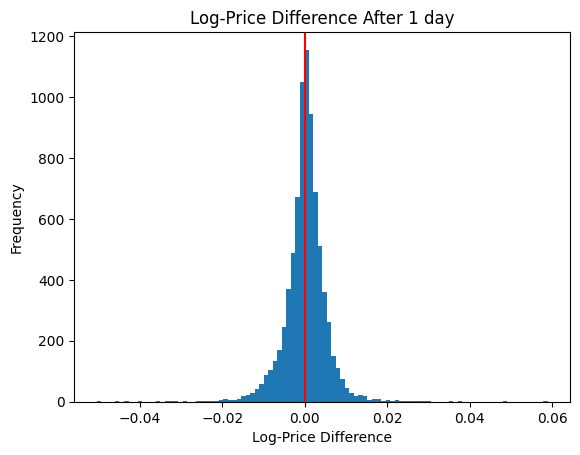

In [ ]:
# @title SPY 1 Day Change Graph
historical_stats_after_waiting(days=1, period='1 day', print_data=False)

We are assuming that the stock market difference for each day is IID (independent and identically distributed), so we assume all future stock market differences have the same distribution. Using this exact distribution, and assuming we have a net worth of $X$, let's calculate how much money $b$ we should spend on this stock.

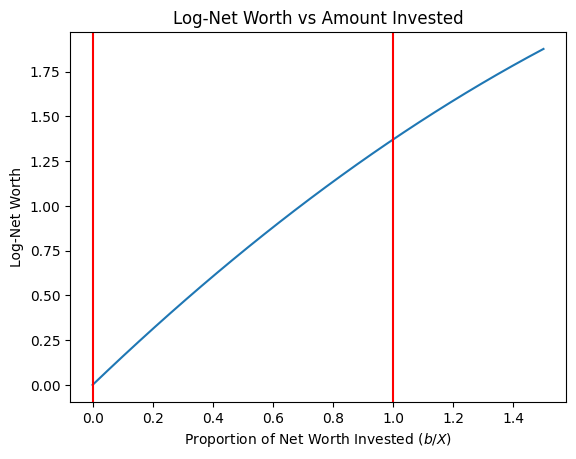

In [ ]:
# @title Utility of Stock Investment Graph
prices = np.log10(np.array(spy['Close']))
log_diffs = prices[1:] - prices[:-1]
n = len(log_diffs)
ps = np.linspace(0, 1.5, 30)
rs = []
for p in ps:
  rs.append(sum(np.log10((1 - p) + p * np.power(10, ld)) for ld in log_diffs))
plt.plot(ps, rs)
plt.axvline(x=0, color='r')
plt.axvline(x=1, color='r')
plt.title(f'Log-Net Worth vs Amount Invested')
plt.ylabel('Log-Net Worth')
plt.xlabel('Proportion of Net Worth Invested ($b/X$)')
plt.show()

As we can see, the value of $b$ that gives us the highest utility (log-net worth) is $b = 1 \cdot X$. This is because we can only choose to invest values of $b$ between $0$ and $X$, shown by the red lines. But in fact, if we could invest *more* than our net worth (i.e. leverage) in SPY, we would even be willing to do that!

Let's see exactly how much we would be willing to leverage.

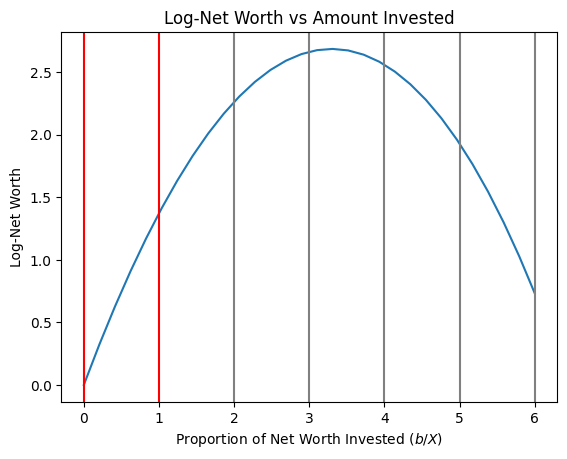

In [ ]:
# @title Utility of Leveraged Stock Investment Graph
ps = np.linspace(0, 6, 30)
rs = []
for p in ps:
  rs.append(sum(np.log10((1 - p) + p * np.power(10, ld)) for ld in log_diffs))
plt.plot(ps, rs)
plt.axvline(x=0, color='r')
plt.axvline(x=1, color='r')
for i in range(2, 7):
  plt.axvline(x=i, color='grey')
plt.title(f'Log-Net Worth vs Amount Invested')
plt.ylabel('Log-Net Worth')
plt.xlabel('Proportion of Net Worth Invested ($b/X$)')
plt.show()

We see that the expected log-net worth is maximized when we are able to leverage until somewhere between a total of three and four times our net worth in SPY. In reality, we are not able to do this because leveraging requires taking out loans, which have an interest rate (cost) associated with them. Also, nobody would give out loans just for investment in stock.

## Applying Logarithmic Utility to Risk-Free Treasuries

The previous example only considered one variable $b$, which can range from $0$ to $X$. $b$ is the amount of SPY we would hold, and the rest ($X - b$) would be cash. But we (hopefully) already understand that holding cash is not a viable alternative to holding stock.

In reality, there could be many variables. Instead of maximizing utility $u$ simply as a function of $b$, we should be maximizing $u(b_1, b_2, b_3, ..., b_n)$, where $n$ is the number of different investment opportunities that are available subject to the constraints $0\le b_i$ for all $i$, and $0 \le \sum b_i\le X$.

Let's again consider the risk-free asset in comparison to SPY. In this case, we have $b_1$ invested in SPY and $b_2$ invested in a 10-year treasury, where $0\le b_1, b_2$ and $0 \le b_1 + b_2 \le X$. We can see that the solution yielding the highest log-net worth will have $b_1 + b_2 = X$, since whatever we don't invest in stock will be invested in the treasury for "free" money. There's no benefit to holding cash over the risk-free asset. Note that this is only true specific to this toy example, where we can cash out the treasury at any time.

For this example, I'm going to assume a fixed interest rate for the risk-free interest to simplify the math.

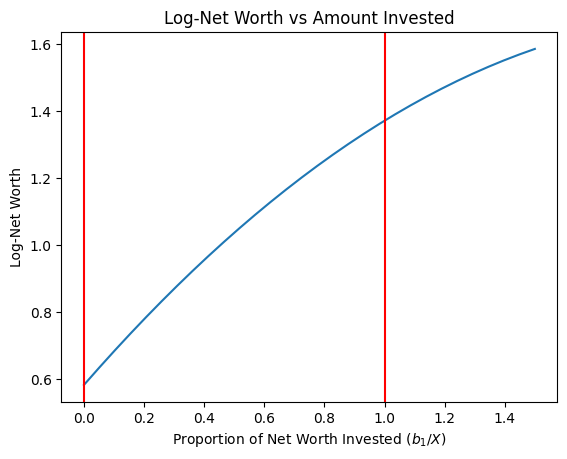

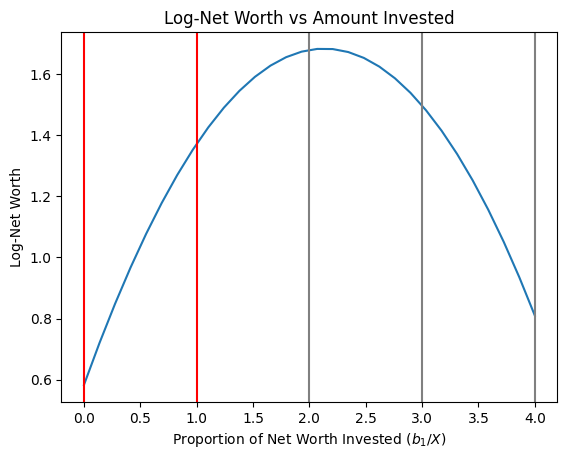

Interest rate used for this calculation (as of 2024-10-25): 4.23%


In [ ]:
# @title Utility of Stock Investment Graph with Risk-Free Alternative
interest_rate_today = interest['Close'].iloc[-1]
printable_date = interest['Close'].index[-1].strftime('%Y-%m-%d')
daily_interest = 1 + interest_rate_today / 100 / 252

ps = np.linspace(0, 1.5, 30)
rs = []
for p in ps:
  rs.append(sum(np.log10((1 - p) * daily_interest + p * np.power(10, ld)) for ld in log_diffs))
plt.plot(ps, rs)
plt.axvline(x=0, color='r')
plt.axvline(x=1, color='r')
plt.title(f'Log-Net Worth vs Amount Invested')
plt.ylabel('Log-Net Worth')
plt.xlabel('Proportion of Net Worth Invested ($b_1/X$)')
plt.show()

ps = np.linspace(0, 4, 30)
rs = []
for p in ps:
  rs.append(sum(np.log10((1 - p) * daily_interest + p * np.power(10, ld)) for ld in log_diffs))
plt.plot(ps, rs)
plt.axvline(x=0, color='r')
plt.axvline(x=1, color='r')
plt.axvline(x=2, color='gray')
plt.axvline(x=3, color='gray')
plt.axvline(x=4, color='gray')
plt.title(f'Log-Net Worth vs Amount Invested')
plt.ylabel('Log-Net Worth')
plt.xlabel('Proportion of Net Worth Invested ($b_1/X$)')
plt.show()
print(f'Interest rate used for this calculation (as of {printable_date}): {np.round(interest_rate_today, 2)}%')

At first glance, these graphs look almost identical to the SPY vs. cash graphs. But if you look closer, there are a few minor differences.

As we can see, with the alternative of a 10-year treasury, when we invest $b_1 = 0$, we get positive log-net worth (as opposed to before, when we got 0). When we invest $b_1 = X$, the log-net worth is the same as before, since the risk-free interest rate does not affect our utility if we're not invested in it at all.

And additionally, with this alternative available, we are "only" willing to leverage somewhere around 2 times our net worth in SPY.

But the takeaway is the same. The best amount to invest in SPY (that maximizes expected log-net worth) is everything you have.

# Timing the Market


Let's revisit our hypothetical stocks. Imagine a new stock, called "DOH" or "Double Or Half." Each day, this stock starts the day with price $x$. Then at the end of the day, it will either have price $\frac{1}{2}x$ or $2x$, each with equal probability. DOH has positive expected value (specifically, $+\frac{1}{4}x$ each day).

Side note: the reason I chose to use DOH instead of TON in this example is that TON ceases to exist once the price reaches 0.

Let's calculate how much we should invest in DOH using the same math as before:
- Your net worth is $X$, and you buy $b$.
- Your utility would have a $\frac{1}{2}$ chance of being $\log(X+b)$ and a $\frac{1}{2}$ chance of being $\log(X-\frac{1}{2}b)$.
- So the expected value of your utility is $\frac{1}{2}(\log(X+b) + \log(X-\frac{1}{2}b))=\frac{1}{2}\log(-\frac{1}{2}b^2 + \frac{1}{2}Xb + X^2)$.
- We are trying to choose $b$ to maximize this quantity, where $X$ is a constant. The value of $b$ that maximizes this quantity is $b=\frac{1}{2}X$.

So we should be investing half our net worth each day in this stock.

---

Let's say we do just that. We invest half of our net worth in DOH on the first day.

The next day, let's suppose DOH doubles. Now, we have $\frac{1}{2}X$ of uninvested cash and $X$ invested in DOH. So our net worth went from $X$ to $\frac{3}{2}X$.

Before the stock doubles or halves the following day, we should again only be investing half our net worth in DOH. So we would like to have $\frac{3}{4}X$ in cash and $\frac{3}{4}X$ in DOH. This means we need to sell $\frac{1}{4}X$ of our DOH.

Now, before the next day, to simplify the math, let $Y=\frac{3}{2}X$ be our current net worth.

The next day, let's suppose DOH halves. Now, we have $\frac{1}{2}Y$ of cash and $\frac{1}{4}Y$ of DOH, for a total of $\frac{3}{4}Y$. (Or alternatively, $\frac{9}{8}X$. We made some money!)

Before the stock doubles or halves the following day, we should again only be investing half of our net worth in DOH. So we would like to have $\frac{3}{8}Y$ in cash and $\frac{3}{8}Y$ in DOH. This means we need to buy $\frac{1}{8}Y$ of DOH.

---

Notice that whenever DOH drops, we buy some more shares. And whenever DOH increases, we sell some of our shares. This is also known as "timing the market." We wait until the stock drops to buy, and we wait until the stock increases to sell.

You might be surprised to see this. Perhaps you're asking, "but DOH is a stock with positive expected value! Shouldn't we just hold?" The answer is "no." To mathematically optimize our expected log net worth, this stock is actually worth "timing." We shouldn't just be holding as much as we can in this stock. The variance of DOH is high enough that we can actually make money by constantly waiting for the stock price to decrease so we can buy and waiting for the stock price to increase so we can sell.

In fact, if we only bought and held DOH, the price would random walk (on a logarithmic scale). After an infinite number of days, we would most likely be where we started.

## "Time in the Market Beats Timing the Market"

There's a common saying that **"time in the market beats timing the market."** Meaning that to optimize for money, you should just buy and hold stock instead of waiting around for the price to drop. You may have heard this so often that you just assume it to be true.

However, this statement is not axiomatic. It's simply a function of the existing markets in the real world. SPY historically has had extremely high expected value and low (enough) variance. SPY and other real stocks *make* this statement true. It's a statement derived from the flourishment of the market.

# A New Perspective

For the entire article so far, we were considering exchanging cash (USD, for example) for shares of SPY. We mentioned "risk," which involved a chance of reducing our value of USD in our bank account. The number of dollars that shows up.

Consider an alternate world. One in which you measure your net worth in shares of SPY. And just like in the real world, you can "buy" the asset of USD at an approximate rate of 1 SPY to 580 USD (again, as of October 2024). Everything in this world is the same. Everything except your mindset.

By holding SPY, your net worth stays the same. The "risk" in this case is zero, but you aren't gaining money either. The question is no longer, "When should we buy SPY with our USD?" Instead, the question is now, "When should we buy USD with our SPY?" Or alternatively, "If we are holding USD, should we sell it for SPY?" Since SPY is relatively liquid, switching between holding the two assets is close to trivial. Meaning these two questions are equivalent.

All the math we did before is the same (but opposite in some sense). The numbers all say to never "buy" USD. Always hold our SPY "cash." One in this world may think:

*It honestly seems like USD is a pretty bad investment. It seems to trend down over time. There's a small chance it spikes up for a bit, doubling within a few months, but that has only ever occured twice in the past 30 years. Other than those two instances, USD has slowly gone down.*

We can run the same experiments from before, but from this new perspective. What would the return be if you bought USD with your hard earned SPY?

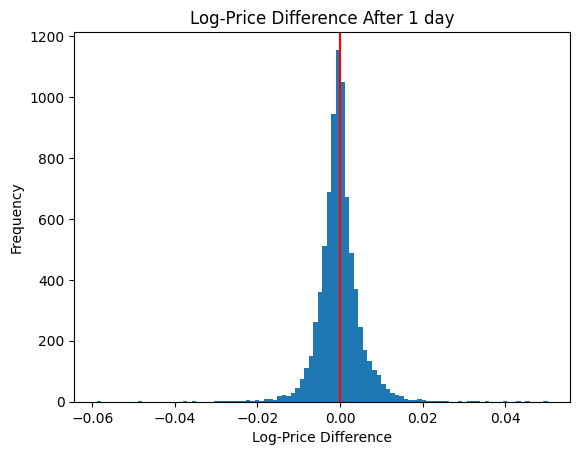

Average log-price change: -0.00017
Standard deviation of log-price change: 0.0051

Geometric mean of price change: -0.04%

Price change percentiles (5, 15, 50, 85, 95):
(-1.676, -0.946, -0.068, +0.866, +1.844)%

Worst case: -12.68%
Best case: +12.29%

Chance of "regret" (i.e. that price is higher today than 1 day in the future): 54.0%


In [ ]:
# @title 1 Day
historical_stats_after_waiting(days=1, period='1 day', inverse=True)

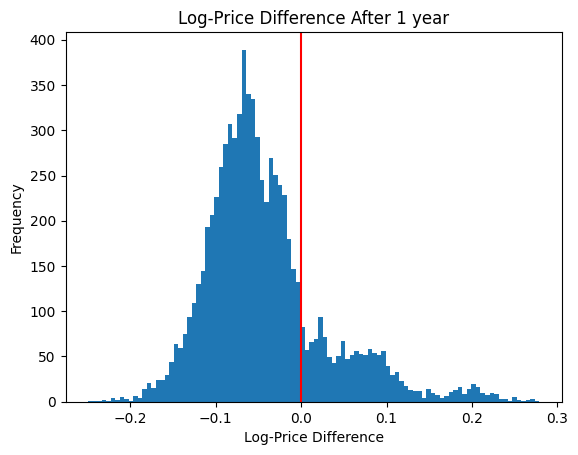

Average log-price change: -0.04222
Standard deviation of log-price change: 0.07206

Geometric mean of price change: -9.26%

Price change percentiles (5, 15, 50, 85, 95):
(-26.516, -21.353, -12.193, +5.717, +25.508)%

Worst case: -43.66%
Best case: +89.95%

Chance of "regret" (i.e. that price is higher today than 1 year in the future): 80.7%


In [ ]:
# @title 1 Year
historical_stats_after_waiting(days=252, period='1 year', inverse=True)

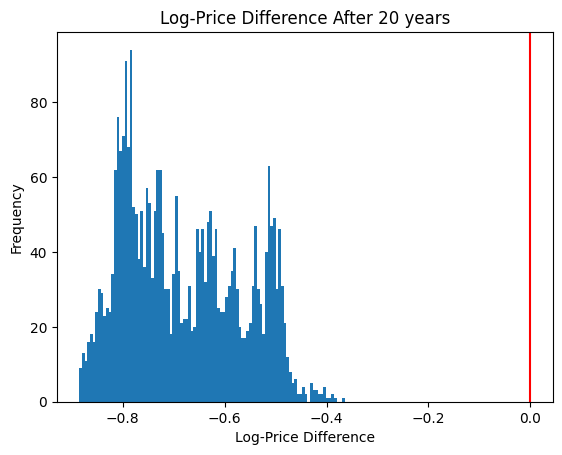

Average log-price change: -0.68276
Standard deviation of log-price change: 0.11543

Geometric mean of price change: -79.24%

Price change percentiles (5, 15, 50, 85, 95):
(-85.6, -84.325, -80.143, -70.633, -67.843)%

Worst case: -86.97%
Best case: -56.82%

Chance of "regret" (i.e. that price is higher today than 20 years in the future): 100.0%


In [ ]:
# @title 20 Years
historical_stats_after_waiting(days=5040, period='20 years', inverse=True)

One may think:

*There's even this other asset they call "risk-free." I wonder why they call it that. It seems quite risky to me. It seems only slightly better than this USD asset. My net worth (measured in shares of SPY) would definitely go down if I invested in this.*

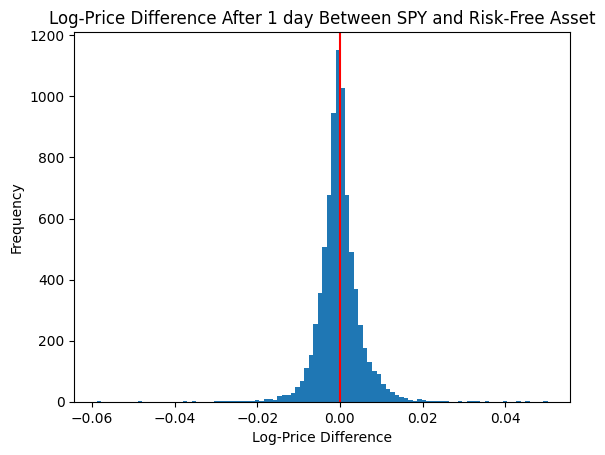

Average log-price difference: -0.0001
Standard deviation of log-price difference: 0.00511

Geometric mean of price difference: -0.02%

Price difference percentiles (5, 15, 50, 85, 95):
(-1.667, -0.931, -0.053, +0.886, +1.866)%

Worst case: -12.67%
Best case: +12.29%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 1 day in the future): 53.5%


In [ ]:
# @title "Risk-Free" 1 Day
historical_stats_compared_to_risk_free(days=1, period='1 day', inverse=True)

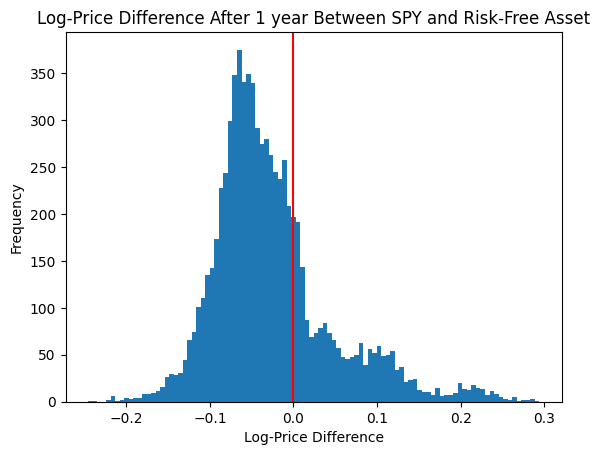

Average log-price difference: -0.02558
Standard deviation of log-price difference: 0.0726

Geometric mean of price difference: -5.72%

Price difference percentiles (5, 15, 50, 85, 95):
(-23.404, -17.99, -8.911, +9.927, +31.578)%

Worst case: -43.18%
Best case: +96.66%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 1 year in the future): 74.2%


In [ ]:
# @title "Risk-Free" 1 Year
historical_stats_compared_to_risk_free(days=252, period='1 year', inverse=True)

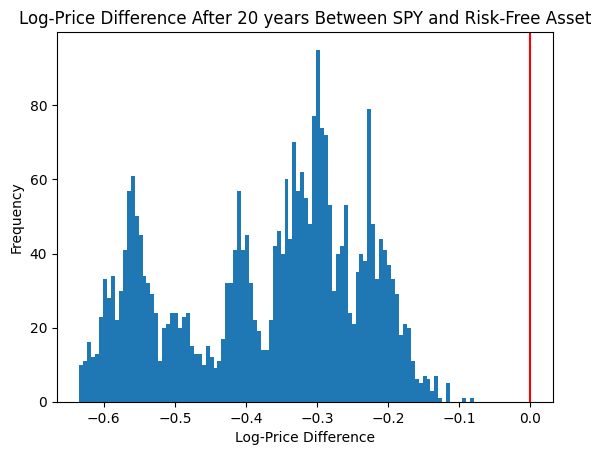

Average log-price difference: -0.37011
Standard deviation of log-price difference: 0.13017

Geometric mean of price difference: -57.35%

Price difference percentiles (5, 15, 50, 85, 95):
(-74.285, -71.894, -54.018, -40.83, -35.603)%

Worst case: -76.78%
Best case: -16.72%

Chance of "regret" (i.e. that price is higher today than the risk-free asset 20 years in the future): 100.0%


In [ ]:
# @title "Risk-Free" 20 Years
historical_stats_compared_to_risk_free(days=5040, period='20 years', inverse=True)

My point is that if you're "scared" of buying SPY with USD, you should be even more scared of "buying" USD with SPY. Of these two options in which you can hold your net worth, SPY is clearly the better choice.

The market is full of currencies, assets, and different investment strategies. The "best" choice is the one that maximizes your expected utility. The only tangible "risk" that you take on is making the wrong choice of strategy. When investing, the only cost is opportunity cost.

People may be "risk averse" and want to hold on to USD, specifically. But what about CAD? What about EUR? JPY? Even cryptocurrencies could join the list of potential assets. These all have an exchange rate. And each of them could increase or decrease drastically in comparison to each other. Why be anchored to USD?

---

The only thing that may not be as convincing about this mindset is that the price of goods scales with USD (+inflation). So if USD suddenly "spikes," there's a chance you would be able to buy less ice cream or Pepsi or other desirable item (in the US specifically) with all your net worth. But again, there have only been two instances of this in the past 30 years.

The prices of goods, while slightly more correlated with USD, aren't even that well correlated. Prices slowly increase over time due to inflation, and they can and do also fluctuate with respect to USD. Supply chain issues, government policies, global pandemics, and many other factors can all cause prices to massively fluctuate, seemingly overnight.

# Revisiting Taxes

**Note: I put this section as the last section because it is extremely important.**

Near the beginning of this article, I mentioned that we are assuming that all the transactions are done in a Roth IRA or other tax-free account. This means there is no option for a high-yield savings account. In order to accrue risk-free interest, one option would be to just directly buy a 10-year treasury.

However, in most other accounts, you will be taxed every time a gain is "realized." This includes selling any asset (such as stock), cashing out a treasury (after 10 years), and *the interest from high-yield savings accounts*.

This decreases the base of the exponential growth of your net worth (as we saw in [Side Note: The Reality of Taxes section](#scrollTo=MfDuQHJLt0tn)). This is *incredibly bad* in the long term. This reduction is not quite bad in the case of treasuries, since you're only taxed on the federal level for treasuries. And they're even less bad for dividends of stocks (assuming you're holding stocks for a long time and have qualified dividends).

The easiest way to avoid these taxes is to simply buy a stock and never sell it until you *need* the money. Hopefully, this will be 40 or 50 years later, after you retire.

So all the points I made before about investing in stocks apply *even more* than I mentioned throughout the article.

# Conclusion

**Reducing Variance by Simply Holding and Waiting**

One question you should be asking yourself when considering investment options is "when am I going to sell this asset?" This may include retirement or a large purchase (property, a luxury car, etc.)

If the answer to that question is "in a very long time," then you should always take the higher average yield option, even at a higher "risk."

Obviously, the exact numbers matter, since if the "risk" is high enough, perhaps even 50 or 100 years may not be enough to reduce the risk to a neglegible amount. But with the actual numbers of the current and historical stock market, it seems like around 10 years is enough time to offset considerable/most variance (with high probability), and 20 years is more than enough time to all but statistically guarantee a benefit over other prospects.

Even in shorter time frames, stocks beat out other lower risk investments (on average). But if you are risk averse, and the high variance is important to avoid, it can easily be reduced by just waiting.

And if you have a sufficient emergency fund and are relatively young (for example, less than 50 years old), then stocks are almost certainly your best option, whether you are risk averse or not.

---

**Maximizing Log-Net Worth**

By maximizing expected log-net worth, the strategy you reach naturally exhibits desirable traits of increasing expected value and decreasing variance.

If you accept using log-net worth as a proxy for utility (as a function of money), then by maximizing expected utility, it is clear we should be buying SPY (perhaps even more than we can physically afford) instead of collecting risk-free interest.

---

**Opportunity Cost Mindset**

The risk-free interest is only "risk-free" in name. If you consider opportunity costs, putting money in a high-yield savings account is just as risky, but with lower expected value.

It's really bad in the long term. Usually these accounts are only used for emergency funds to decrease covariance with the stock market in case of a pretty drastic event (you know, an emergency).

---

**Taxes**

The fact that taxes exist and apply every year (including to interest in savings accounts) just exacerbates all the previous points I have made. The best thing to do to avoid taxes and have the highest exponential growth possible is to buy an asset with a high exponential base and hold it for as long as possible to only incur a one-time cost.